In [149]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, RocCurveDisplay,  classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
from scipy import stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

In [53]:
set_config(display='diagram')

In [54]:
X_init = pd.read_csv('Data/training_set_features.csv', index_col=0)
y_init = pd.read_csv('Data/training_set_labels.csv', index_col=0)

In [55]:
X_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [56]:
(X_init.isna().sum()/len(X_init)).sort_values(ascending=False)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_children             0.009323
household_adults               0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


In [57]:
X_drop = X_init.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis=1)

In [58]:
X_drop.corrwith(y_init['h1n1_vaccine']).sort_values(ascending=False)

doctor_recc_h1n1               0.393890
opinion_h1n1_risk              0.323265
opinion_h1n1_vacc_effective    0.269347
opinion_seas_risk              0.258571
doctor_recc_seasonal           0.209864
opinion_seas_vacc_effective    0.179272
health_worker                  0.169768
h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
chronic_med_condition          0.095207
opinion_h1n1_sick_from_vacc    0.075091
behavioral_wash_hands          0.074712
behavioral_touch_face          0.071648
behavioral_face_mask           0.070498
child_under_6_months           0.066962
behavioral_avoidance           0.047690
behavioral_antiviral_meds      0.040608
behavioral_outside_home        0.021768
behavioral_large_gatherings    0.017822
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
dtype: float64

In [59]:
X_drop.corrwith(y_init['seasonal_vaccine']).sort_values(ascending=False)

opinion_seas_risk              0.390106
doctor_recc_seasonal           0.369190
opinion_seas_vacc_effective    0.361875
opinion_h1n1_risk              0.216625
opinion_h1n1_vacc_effective    0.205072
doctor_recc_h1n1               0.198607
chronic_med_condition          0.170174
h1n1_concern                   0.154828
health_worker                  0.127311
behavioral_touch_face          0.120228
h1n1_knowledge                 0.120152
behavioral_wash_hands          0.112414
behavioral_avoidance           0.076395
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_face_mask           0.050083
opinion_h1n1_sick_from_vacc    0.027404
child_under_6_months           0.012097
behavioral_antiviral_meds      0.006277
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
dtype: float64

In [60]:
y_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [61]:
y_init['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [62]:
y_init['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [63]:
y_drop = y_init.drop('h1n1_vaccine', axis=1)

In [64]:
y_drop

,seasonal_vaccine
respondent_id,
0,0
1,1
2,0
3,1
4,0
...,...
26702,0
26703,0
26704,1


In [65]:
X_drop.corrwith(y_drop['seasonal_vaccine']).sort_values(ascending=False)

opinion_seas_risk              0.390106
doctor_recc_seasonal           0.369190
opinion_seas_vacc_effective    0.361875
opinion_h1n1_risk              0.216625
opinion_h1n1_vacc_effective    0.205072
doctor_recc_h1n1               0.198607
chronic_med_condition          0.170174
h1n1_concern                   0.154828
health_worker                  0.127311
behavioral_touch_face          0.120228
h1n1_knowledge                 0.120152
behavioral_wash_hands          0.112414
behavioral_avoidance           0.076395
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_face_mask           0.050083
opinion_h1n1_sick_from_vacc    0.027404
child_under_6_months           0.012097
behavioral_antiviral_meds      0.006277
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, random_state=50)

In [67]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
16087,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,oxchjgsf,"MSA, Principle City",2.0,0.0
9261,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,Non-MSA,1.0,0.0
16193,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,2.0
18216,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,dqpwygqj,"MSA, Principle City",0.0,0.0
9161,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,kbazzjca,Non-MSA,1.0,2.0
22637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,NaN,NaN,NaN,NaN,kbazzjca,Non-MSA,2.0,3.0
10123,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,"> $75,000",Married,Own,Not in Labor Force,oxchjgsf,"MSA, Not Principle City",1.0,0.0


In [68]:
numerical_pipeline = Pipeline(steps=[
    ('impute_nums', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
#describe why median was chose
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())])

trans = ColumnTransformer(transformers=[
     ('numerical', numerical_pipeline, make_column_selector(dtype_include=np.number)),
     ('categorical', categorical_pipeline, make_column_selector(dtype_include=object))     
])

In [69]:
simple_model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('tree', DecisionTreeClassifier(max_depth=2, random_state=50))
    ])

In [70]:
num_col = make_column_selector(dtype_include=np.number)(X_train)
cat_col = make_column_selector(dtype_include=object)(X_train)
cols = num_col+cat_col

In [71]:
simple_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_nums',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                ('tree', DecisionTreeClassifier(max_depth=2, random_state=50))])

In [72]:
simple_model_pipe.score(X_train, y_train)

0.7220169745381927

In [73]:
simple_model_pipe.score(X_test, y_test)

0.7158903699266137

In [74]:
simple_preds = simple_model_pipe.predict(X_test)
print(f'This is our f1 score: {f1_score(y_test, simple_preds)}')
print(f'This is our roc-auc score: {roc_auc_score(y_test, simple_preds)}')
print(f'This is our precision score: {precision_score(y_test, simple_preds)}')
print(f'This is our recall score: {recall_score(y_test, simple_preds)}')

This is our f1 score: 0.7136603773584906
This is our roc-auc score: 0.7176303623769451
This is our precision score: 0.6812680115273775
This is our recall score: 0.7492868462757528


In [75]:
simple_importance = simple_model_pipe.named_steps['tree'].feature_importances_
pd.Series(simple_importance, index=X_train.columns).sort_values(ascending=False)

opinion_seas_vacc_effective    0.591166
doctor_recc_seasonal           0.408834
h1n1_concern                   0.000000
household_adults               0.000000
census_msa                     0.000000
hhs_geo_region                 0.000000
employment_status              0.000000
rent_or_own                    0.000000
marital_status                 0.000000
income_poverty                 0.000000
sex                            0.000000
race                           0.000000
education                      0.000000
age_group                      0.000000
opinion_seas_sick_from_vacc    0.000000
opinion_seas_risk              0.000000
opinion_h1n1_sick_from_vacc    0.000000
h1n1_knowledge                 0.000000
opinion_h1n1_risk              0.000000
opinion_h1n1_vacc_effective    0.000000
health_worker                  0.000000
child_under_6_months           0.000000
chronic_med_condition          0.000000
doctor_recc_h1n1               0.000000
behavioral_touch_face          0.000000


In [76]:
log_model_pipe = Pipeline(steps=[
    ('trans', trans), ## need to drop out unused columns from the pipeline
    ('log', LogisticRegression(random_state=50))
    ])

In [77]:
log_model_pipe.fit(X_train[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']], y_train)

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_nums',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                ('log', LogisticRegression(random_state=50))])

In [78]:
log_model_pipe.score(X_test[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']], y_test)

0.7259248165343717

In [79]:
simplog_preds = log_model_pipe.predict(X_test[['opinion_seas_vacc_effective', 'doctor_recc_seasonal']])

In [80]:
def ScoreDisplay(preds):
    print(f'This is our f1 score: {f1_score(y_test, preds)}')
    print(f'This is our roc-auc score: {roc_auc_score(y_test, preds)}')
    print(f'This is our precision score: {precision_score(y_test, preds)}')
    print(f'This is our recall score: {recall_score(y_test, preds)}')
    print(f'This is our accuracy: {accuracy_score(y_test, preds)}')

In [81]:
ScoreDisplay(simplog_preds)

This is our f1 score: 0.7166305357695881
This is our roc-auc score: 0.7263163128571055
This is our precision score: 0.7005752346351801
This is our recall score: 0.7334389857369256
This is our accuracy: 0.7259248165343717


In [82]:
log_odds = log_model_pipe.named_steps['log'].coef_
log_odds

array([[0.85995859, 0.73711464]])

In [156]:
def logOddsPipelineConverter(data, colt):
    odds = []
    for item in data:
        for score in item:
            odds.append((np.exp(score) - 1)*100)
    return pd.Series(odds, index=colt)

In [84]:
logOddsPipelineConverter(log_odds)

[136.30628447193388, 108.98967095230799]

In [85]:
X_train['opinion_seas_vacc_effective'].describe()

count    19678.000000
mean         4.027086
std          1.088888
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: opinion_seas_vacc_effective, dtype: float64

In [86]:
X_train['doctor_recc_seasonal'].describe()

count    18452.000000
mean         0.327119
std          0.469174
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: doctor_recc_seasonal, dtype: float64

In [87]:
X_train_trans = pd.DataFrame(trans.fit_transform(X_train),
             columns=cols,
             index=X_train.index)

In [88]:
X_train_trans.corrwith(y_train['seasonal_vaccine']).sort_values(ascending=False)

opinion_seas_risk              0.386732
doctor_recc_seasonal           0.367122
opinion_seas_vacc_effective    0.356234
age_group                      0.280576
opinion_h1n1_risk              0.218364
opinion_h1n1_vacc_effective    0.203845
doctor_recc_h1n1               0.202799
chronic_med_condition          0.176750
h1n1_concern                   0.151502
health_worker                  0.127277
h1n1_knowledge                 0.120049
behavioral_touch_face          0.119534
behavioral_wash_hands          0.108003
race                           0.099749
behavioral_avoidance           0.077706
employment_status              0.062044
behavioral_large_gatherings    0.061561
behavioral_outside_home        0.053363
behavioral_face_mask           0.051062
opinion_h1n1_sick_from_vacc    0.024881
education                      0.022890
child_under_6_months           0.015628
behavioral_antiviral_meds      0.001990
census_msa                    -0.013233
hhs_geo_region                -0.020212


In [89]:
X_train_trans.corr()['opinion_seas_vacc_effective'].sort_values(ascending=False)

opinion_seas_vacc_effective    1.000000
opinion_h1n1_vacc_effective    0.475409
opinion_seas_risk              0.344946
h1n1_concern                   0.231543
opinion_h1n1_risk              0.225527
doctor_recc_seasonal           0.172938
behavioral_wash_hands          0.139549
age_group                      0.131859
behavioral_avoidance           0.115372
behavioral_touch_face          0.106723
doctor_recc_h1n1               0.106182
chronic_med_condition          0.092186
h1n1_knowledge                 0.088002
behavioral_large_gatherings    0.079590
opinion_h1n1_sick_from_vacc    0.078400
behavioral_outside_home        0.067623
race                           0.061741
employment_status              0.051741
health_worker                  0.034140
behavioral_face_mask           0.033189
child_under_6_months           0.011288
behavioral_antiviral_meds      0.010115
education                      0.000554
income_poverty                -0.010229
census_msa                    -0.010507


In [90]:
X_train['race'].value_counts()

White                15909
Black                 1587
Hispanic              1321
Other or Multiple     1213
Name: race, dtype: int64

In [91]:
X_train_trans['race'].value_counts()

3.0    15909
0.0     1587
1.0     1321
2.0     1213
Name: race, dtype: int64

In [92]:
log_model_pipe.fit(X_train, y_train)

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_nums',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                ('log', LogisticRegression(random_state=50))])

In [93]:
log_model_pipe.score(X_train, y_train)

0.7759860209685472

In [94]:
log_model_pipe.score(X_test, y_test)

0.7659128351055864

In [95]:
pd.Series(log_model_pipe.named_steps['log'].coef_[0], index=cols).sort_values(ascending=False)

opinion_seas_risk              0.713229
doctor_recc_seasonal           0.680935
opinion_seas_vacc_effective    0.599357
age_group                      0.369784
health_worker                  0.250859
h1n1_knowledge                 0.106490
chronic_med_condition          0.105837
race                           0.104859
behavioral_touch_face          0.103943
opinion_h1n1_risk              0.070264
education                      0.058691
behavioral_wash_hands          0.025305
behavioral_antiviral_meds      0.022614
child_under_6_months           0.021100
behavioral_face_mask           0.015229
opinion_h1n1_vacc_effective    0.007466
employment_status              0.003864
sex                           -0.003282
behavioral_avoidance          -0.003302
h1n1_concern                  -0.004085
hhs_geo_region                -0.006643
income_poverty                -0.007883
behavioral_large_gatherings   -0.018002
behavioral_outside_home       -0.022032
household_children            -0.039170


In [96]:
log_cols = ['opinion_seas_risk', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'age_group', 'health_worker', 'opinion_seas_sick_from_vacc']

In [97]:
log_model_pipe.fit(X_train[log_cols]
                   ,y_train)

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_nums',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                ('log', LogisticRegression(random_state=50))])

In [98]:
log_model_pipe.score(X_train[log_cols], y_train)

0.7710933599600599

In [99]:
log_model_pipe.score(X_test[log_cols], y_test)

0.7618691028905197

In [100]:
logtwo_preds = log_model_pipe.predict(X_test[log_cols])

In [101]:
ScoreDisplay(logtwo_preds)

This is our f1 score: 0.7392587733683175
This is our roc-auc score: 0.7593970343532301
This is our precision score: 0.7658851512062521
This is our recall score: 0.7144215530903328
This is our accuracy: 0.7618691028905197


In [102]:
rfc_model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('forest', RandomForestClassifier(max_depth=3, random_state=50, n_estimators=10))])

In [103]:
rfc_model_pipe.fit(X_train, y_train)

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_nums',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                ('forest',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=50))])

In [104]:
rfc_model_pipe.score(X_train, y_train)

0.7439340988517225

In [105]:
rfc_model_pipe.score(X_test, y_test)

0.7359592631421297

In [106]:
log_cs_grid = {
    'log__penalty': ['log__', 'l1', 'l2', 'elasticnet', None],
    'log__C' : [0, 5, 10, 20, 50, 75, 100],
    'log__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    }

searchcv = GridSearchCV(estimator=log_model_pipe,
                        param_grid=log_cs_grid,
                        scoring='precision')


In [107]:
searchcv.fit(X_train[log_cols], y_train)

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('impute_nums',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_fr...,
                                                                                         ('encode',
                                                                                          OrdinalEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                                       ('log',
                                        LogisticRegression(random_state=50))]),
             param_grid={'log__C': [0, 5, 10, 20, 50, 75, 100],
                         'log__penalty': ['log__', 'l1', 'l2', 'elasticnet',
                                          None],
                         'log__solver': ['lbfgs', 'newton-cg',
                                         'newton-cholesky', 'sag', 'saga']},
             scoring='precision')

In [108]:
searchcv.best_params_

{'log__C': 5, 'log__penalty': 'l1', 'log__solver': 'saga'}

In [109]:
searchcv.best_score_

0.7717058384737966

In [110]:
searchcv.score(X_test[log_cols],y_test)

0.7658851512062521

In [111]:
grid_preds = searchcv.predict(X_test[log_cols])

In [112]:
ScoreDisplay(grid_preds)

This is our f1 score: 0.7392587733683175
This is our roc-auc score: 0.7593970343532301
This is our precision score: 0.7658851512062521
This is our recall score: 0.7144215530903328
This is our accuracy: 0.7618691028905197


In [113]:
final_log_pipe = Pipeline(steps=[
                                 ('trans', trans),
                                 ('log', LogisticRegression(C=5, penalty='l1', solver= 'saga',random_state=50))
                                 ])

In [114]:
final_log_pipe.fit(X_train[log_cols], y_train)

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_nums',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E3343AA30>),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021E348D1CA0>)])),
                ('log',
                 LogisticRegression(C=5, penalty='l1', random_state=50,
                                    solver='saga'))])

In [115]:
final_log_pipe.score(X_train[log_cols], y_train)

0.7710933599600599

In [116]:
final_log_pipe.score(X_test[log_cols], y_test)

0.7618691028905197

In [117]:
finallog_preds = final_log_pipe.predict(X_test[log_cols])

In [118]:
ScoreDisplay(finallog_preds)

This is our f1 score: 0.7392587733683175
This is our roc-auc score: 0.7593970343532301
This is our precision score: 0.7658851512062521
This is our recall score: 0.7144215530903328
This is our accuracy: 0.7618691028905197


In [119]:
final_coef = final_log_pipe.named_steps['log'].coef_

In [120]:
pd.Series(logOddsPipelineConverter(final_coef), index=log_cols)

opinion_seas_risk              110.451086
doctor_recc_seasonal            89.482682
opinion_seas_vacc_effective     85.345827
age_group                       32.604385
health_worker                  -27.606755
opinion_seas_sick_from_vacc     50.912633
dtype: float64

In [121]:
X_train_trans['opinion_seas_vacc_effective'].value_counts()

-0.024656    9017
 0.901908    7521
-1.877784    1652
-2.804348     922
-0.951220     918
Name: opinion_seas_vacc_effective, dtype: int64

In [122]:
X_train['opinion_seas_vacc_effective'].value_counts()

4.0    8665
5.0    7521
2.0    1652
1.0     922
3.0     918
Name: opinion_seas_vacc_effective, dtype: int64

In [123]:
log_reg_grid = {'log__C': stats.uniform(loc=0, scale=10),
               'log__l1_ratio': stats.expon(scale=0.2),
               'log__penalty': ['elasticnet']}

In [124]:
rs = RandomizedSearchCV(estimator=final_log_pipe,
                        param_distributions=log_reg_grid,
                        random_state=50)
rs.fit(X_train[log_cols], y_train)
rs.best_params_

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'log__C': 4.946016455380215,
 'log__l1_ratio': 0.05177567660045704,
 'log__penalty': 'elasticnet'}

In [125]:
rs.score(X_train[log_cols], y_train)

0.7710933599600599

In [126]:
rs.score(X_test[log_cols], y_test)

0.7618691028905197

In [127]:
rs_preds = rs.predict(X_test[log_cols])

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


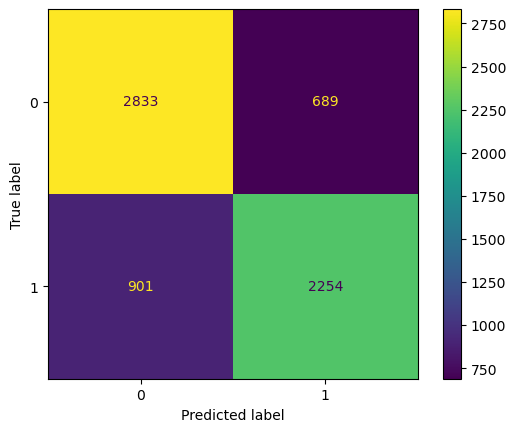

In [128]:
plot_confusion_matrix(estimator=final_log_pipe,
                      X= X_test[log_cols],
                      y_true=y_test)

In [131]:
confusion_matrix(y_pred=simple_preds, y_true=y_test)

array([[2416, 1106],
       [ 791, 2364]], dtype=int64)

In [136]:
classification_report(y_pred=finallog_preds, y_true=y_test, target_names=['no vacc', 'vacc'], output_dict=True)

{'no vacc': {'precision': 0.7587038028923406,
  'recall': 0.8043725156161272,
  'f1-score': 0.7808710033076076,
  'support': 3522},
 'vacc': {'precision': 0.7658851512062521,
  'recall': 0.7144215530903328,
  'f1-score': 0.7392587733683175,
  'support': 3155},
 'accuracy': 0.7618691028905197,
 'macro avg': {'precision': 0.7622944770492963,
  'recall': 0.75939703435323,
  'f1-score': 0.7600648883379626,
  'support': 6677},
 'weighted avg': {'precision': 0.762097116346046,
  'recall': 0.7618691028905197,
  'f1-score': 0.7612084923807751,
  'support': 6677}}

In [146]:
cross_val_score(final_log_pipe, X_train[log_cols], y_train, scoring='precision').mean()

c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.7717058384737966

In [141]:
precision_score(y_test, finallog_preds)

0.7658851512062521

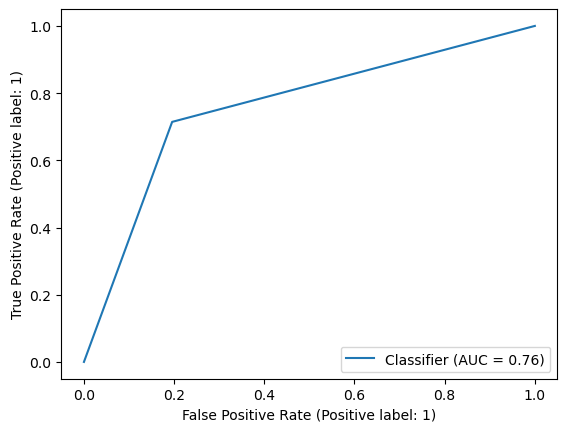

In [154]:
RocCurveDisplay.from_predictions(y_test, finallog_preds)
plt.show()

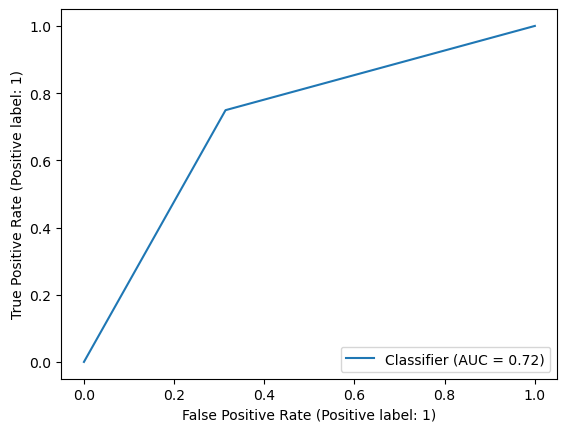

In [155]:
RocCurveDisplay.from_predictions(y_test, simple_preds)

In [161]:
y_cat = y_init['seasonal_vaccine'].apply(lambda x: 'Vaccine'if x == 1 else 'No Vaccine')

In [162]:
y_cat

respondent_id
0        No Vaccine
1           Vaccine
2        No Vaccine
3           Vaccine
4        No Vaccine
            ...    
26702    No Vaccine
26703    No Vaccine
26704       Vaccine
26705    No Vaccine
26706    No Vaccine
Name: seasonal_vaccine, Length: 26707, dtype: object